In [5]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [6]:
def pam(X, k):
    n = len(X)
    medoids = np.random.choice(n, k, replace=False)  # Chọn ngẫu nhiên k medoids
    clusters = np.zeros(n)

    for i in range(100):  # Lặp tối đa 100 lần
        distances = pairwise_distances(X, X[medoids])
        clusters = np.argmin(distances, axis=1)  # Gán điểm vào medoid gần nhất

        new_medoids = np.array([np.argmin(np.sum(distances[clusters == j], axis=0)) for j in range(k)])

        # Map new medoids lại với chỉ số của dữ liệu gốc
        new_medoids = medoids[new_medoids]

        if np.all(medoids == new_medoids):  # Dừng nếu không có sự thay đổi
            break
        medoids = new_medoids
    
    return medoids, clusters

In [7]:
def clara(X, k, num_samples=5, sample_size=None):
    if sample_size is None:
        sample_size = min(40 + 2 * k, len(X))  # Kích thước mẫu

    best_medoids = None
    best_cost = float('inf')
    best_clusters = None

    for _ in range(num_samples):
        # Lấy mẫu ngẫu nhiên từ dữ liệu
        sample_indices = np.random.choice(len(X), sample_size, replace=False)
        sample = X[sample_indices]

        # Chạy thuật toán PAM trên tập mẫu
        medoids, clusters = pam(sample, k)

        # Chuyển các medoids thành chỉ số trong tập dữ liệu đầy đủ
        full_medoids = sample_indices[medoids]

        # Tính khoảng cách cho toàn bộ tập dữ liệu
        full_distances = pairwise_distances(X, X[full_medoids])
        full_clusters = np.argmin(full_distances, axis=1)

        # Tính chi phí bằng tổng khoảng cách nhỏ nhất
        cost = np.sum(np.min(full_distances, axis=1))

        if cost < best_cost:
            best_medoids = full_medoids
            best_cost = cost
            best_clusters = full_clusters

    return best_medoids, best_clusters

In [8]:
def test_clara_pam():
    # Tạo bộ dữ liệu ngẫu nhiên với 3 cụm
    X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

    # Số lượng cụm (số medoids)
    k = 3

    # Chạy thuật toán CLARA
    medoids, clusters = clara(X, k)

    # Vẽ kết quả
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
    
    # Vẽ các medoids
    plt.scatter(X[medoids, 0], X[medoids, 1], c='red', s=200, alpha=0.75, label='Medoids')
    
    plt.title("Kết quả phân cụm bằng thuật toán CLARA")
    plt.legend()
    plt.show()

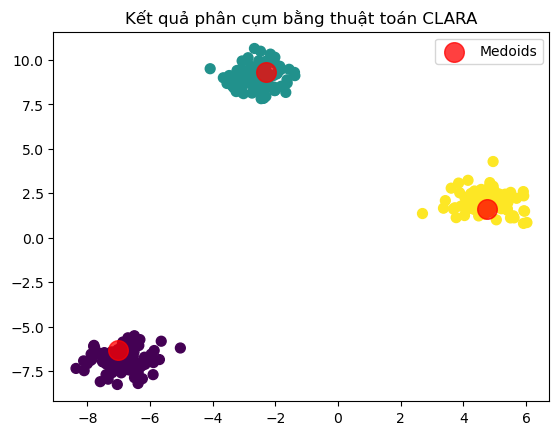

In [9]:
test_clara_pam()